# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Profesor:** Rodrigo A. Carrasco <br>
---

# <h1><center>Clase 18: Exploración de Datos</center></h1>

En este notebook probaremos diferentes metodologías de exploración de datos sobre una base para generar hipótesis, visualizar información y entender qué información está en los datos.

## Caso de Estudio: Análisis de Votaciones Presidenciales en EEUU 2020.


### Descripción del Dataset.

Los datos para este problema correspoden a los resultados de las elecciones presidenciales 2020 de EEUU (Biden vs. Trump), a nivel de condados. Además, se incluyen algunas variables sociodemográficos y resultados de elecciones anteriores.

Estos datos pueden ser visualizados en el siguiente mapa de USA Today:

https://www.usatoday.com/in-depth/graphics/2020/11/10/election-maps-2020-america-county-results-more-voters/6226197002/


### Objetivo.

Analizar el comportamiento de distintos estados y condados en las elecciones presidenciales estadounidenses 2020. Por ejemplo, algunas preguntas que podríamos responder a partir de los datos son:

- ¿Cómo se distribuyen los condados donde ganó la opción demócrata (Biden) o republicana (Trump)?
- ¿En qué se parecen/diferencian?
- ¿Hay correlaciones entre el porcentaje de voto demócrata (o republicano) y otras variables políticas o sociodemográficas?
- ¿Es el comportamiento de un condado o estado, predictor de otro?
- ¿Hay similitudes entre los swing states?

## 1. Datos a analizar

El archivo `county_election_results.csv` será la base que usaremos para este trabajo.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns

### Lectura de Datos.

La librería Pandas implemente métodos de lectura de distintos tipos de datos, entre ellos datos en formato `csv`, mediante la función `read_csv`:

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [3]:
dat = pd.read_csv('county_election_results.csv')

#caculamos el porcentaje de votos D y R en cada condado, para identificar más fácilmente quién ganó en cada uno
dat['pct_D'] = dat['votes_D_2020']/dat['votes_total_2020']*100
dat['pct_R'] = dat['votes_R_2020']/dat['votes_total_2020']*100

dat.head()

,Unnamed: 0,FIPS,eevp,electTotal,electionDate,level,office,state,winner,votes_R_2020,...,votes_2008,votes_2012,votes_2016,category_2016_dem,category_2016_rep,votes_d_2016,votes_r_2016,votes_cast_pct_2016,pct_D,pct_R
0,0,1061,100,0,2020-11-03,FIPSCode,presidential,AL,R,10848,...,11657,11320,11758,NaN,top 10% Trump by percent vote,1525,9994,1.065913,12.726402,86.555493
1,1,1021,100,0,2020-11-03,FIPSCode,presidential,AL,R,16085,...,17785,17462,18369,NaN,top 10% Trump by percent vote,2911,15081,1.049649,15.937970,83.424096
2,2,1049,100,0,2020-11-03,FIPSCode,presidential,AL,R,24767,...,24015,23863,25826,NaN,top 10% Trump by percent vote,3622,21405,1.134438,14.611919,84.534781
3,3,1093,100,0,2020-11-03,FIPSCode,presidential,AL,R,12205,...,12355,12105,12984,NaN,top 10% Trump by percent vote,1432,11274,1.061537,10.614525,88.551114
4,4,1059,100,0,2020-11-03,FIPSCode,presidential,AL,R,10376,...,11693,10859,12040,NaN,NaN,2197,9466,1.043854,16.597708,82.558880


In [5]:
dat.sample(20)

,Unnamed: 0,FIPS,eevp,electTotal,electionDate,level,office,state,winner,votes_R_2020,...,votes_2008,votes_2012,votes_2016,category_2016_dem,category_2016_rep,votes_d_2016,votes_r_2016,votes_cast_pct_2016,pct_D,pct_R
956,956,20011,100,0,2020-11-03,FIPSCode,presidential,KS,R,5023,...,6781,6254,6093,NaN,NaN,1336,4424,1.095684,23.082684,75.239664
2659,2659,48031,100,0,2020-11-03,FIPSCode,presidential,TX,R,5443,...,4939,4973,5685,NaN,NaN,1244,4212,1.308883,25.682032,73.148770
56,56,1011,100,0,2020-11-03,FIPSCode,presidential,AL,R,1146,...,5415,5322,4710,top 10% Clinton by percent vote,NaN,3530,1140,0.978981,74.734331,24.853611
817,817,18045,100,0,2020-11-03,FIPSCode,presidential,IN,R,6154,...,7410,7111,7492,NaN,NaN,1476,5662,1.065537,20.405862,77.088814
2643,2643,48039,100,0,2020-11-03,FIPSCode,presidential,TX,R,90433,...,104940,106739,121181,NaN,NaN,43200,72791,1.278567,40.163162,58.367218
8,8,1089,100,0,2020-11-03,FIPSCode,presidential,AL,R,102780,...,152899,155059,163389,NaN,NaN,62822,89520,1.185912,45.047351,53.043635
360,360,13129,100,0,2020-11-03,FIPSCode,presidential,GA,D,19405,...,17607,16897,18959,NaN,NaN,3181,15191,1.267630,18.241584,80.743145
1547,1547,28003,100,0,2020-11-03,FIPSCode,presidential,MS,R,12818,...,15019,14830,14783,NaN,NaN,2684,11819,1.064601,17.676960,81.446181
154,154,4023,100,0,2020-11-03,FIPSCode,presidential,AZ,D,6194,...,13303,13894,16433,top 10% Clinton by percent vote,NaN,11690,3897,1.190044,67.181428,31.673144
1519,1519,28089,100,0,2020-11-03,FIPSCode,presidential,MS,R,31091,...,47177,49571,49802,NaN,NaN,20343,28265,1.123931,43.663129,55.545432


In [6]:
dat.columns

Index(['Unnamed: 0', 'FIPS', 'eevp', 'electTotal', 'electionDate', 'level',
       'office', 'state', 'winner', 'votes_R_2020', 'votes_D_2020',
       'votes_third_party_2020', 'votes_total_2020', 'export_time',
       'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income', 'category_education', 'category_income',
       'category_nonwhite', 'category_jobs_management',
       'category_jobs_service', 'pew_classification', 'region',
       'category_unemployment', 'date', 'POPESTIMATE2019', 'deaths',
       'deaths_per_thousand', 'deaths_percap_pctile', 'cases',
       'cases_per_thousand', 'cases_percap_pctile', 'case_pct_change',
       'BLS_Area_Code', 'Month', 'Month_Str', 'Labor Force', 'Employment',
       'Unemployment', 'Unemployment Rate', 'county', 'pct_2000_dem',
       'pct_2000_gre', 'pct_2000_rep', 'pct_2004_dem', 'pct_2004_rep',
       'pct_2008_dem', 'pct_2008_rep', 'pct_

In [7]:
columns = ['pct_D','pct_R','acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income','POPESTIMATE2019','state','county','Unemployment Rate','winner','region']
dat2 = dat[columns]

## 2. EDA General

### 2.1 Revisemos algunas cosas generales de la base de datos

In [8]:
dat.head()

,Unnamed: 0,FIPS,eevp,electTotal,electionDate,level,office,state,winner,votes_R_2020,...,votes_2008,votes_2012,votes_2016,category_2016_dem,category_2016_rep,votes_d_2016,votes_r_2016,votes_cast_pct_2016,pct_D,pct_R
0,0,1061,100,0,2020-11-03,FIPSCode,presidential,AL,R,10848,...,11657,11320,11758,NaN,top 10% Trump by percent vote,1525,9994,1.065913,12.726402,86.555493
1,1,1021,100,0,2020-11-03,FIPSCode,presidential,AL,R,16085,...,17785,17462,18369,NaN,top 10% Trump by percent vote,2911,15081,1.049649,15.937970,83.424096
2,2,1049,100,0,2020-11-03,FIPSCode,presidential,AL,R,24767,...,24015,23863,25826,NaN,top 10% Trump by percent vote,3622,21405,1.134438,14.611919,84.534781
3,3,1093,100,0,2020-11-03,FIPSCode,presidential,AL,R,12205,...,12355,12105,12984,NaN,top 10% Trump by percent vote,1432,11274,1.061537,10.614525,88.551114
4,4,1059,100,0,2020-11-03,FIPSCode,presidential,AL,R,10376,...,11693,10859,12040,NaN,NaN,2197,9466,1.043854,16.597708,82.558880


In [9]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3112 non-null   int64  
 1   FIPS                        3112 non-null   int64  
 2   eevp                        3112 non-null   int64  
 3   electTotal                  3112 non-null   int64  
 4   electionDate                3112 non-null   object 
 5   level                       3112 non-null   object 
 6   office                      3112 non-null   object 
 7   state                       3112 non-null   object 
 8   winner                      3112 non-null   object 
 9   votes_R_2020                3112 non-null   int64  
 10  votes_D_2020                3112 non-null   int64  
 11  votes_third_party_2020      3112 non-null   int64  
 12  votes_total_2020            3112 non-null   int64  
 13  export_time                 3112 

In [11]:
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pct_D                       3112 non-null   float64
 1   pct_R                       3112 non-null   float64
 2   acs_pct_pop_nonwhite        3112 non-null   float64
 3   acs_pct_management          3112 non-null   float64
 4   acs_pct_service             3112 non-null   float64
 5   pct_pop25+_bachelor_higher  3112 non-null   float64
 6   median_household_income     3111 non-null   float64
 7   per_capita_income           3111 non-null   float64
 8   POPESTIMATE2019             3112 non-null   int64  
 9   state                       3112 non-null   object 
 10  county                      3112 non-null   object 
 11  Unemployment Rate           3112 non-null   float64
 12  winner                      3112 non-null   object 
 13  region                      3112 

In [12]:
dat[['Unemployment Rate','per_capita_income','acs_pct_pop_nonwhite']].describe()

,Unemployment Rate,per_capita_income,acs_pct_pop_nonwhite
count,3112.000000,3111.000000,3112.000000
mean,6.619762,26978.623594,23.223766
std,2.512746,6465.970838,19.919625
min,0.400000,10148.000000,0.000000
25%,4.900000,22755.500000,7.265591
50%,6.300000,26216.000000,15.862464
75%,7.900000,29995.500000,34.925075
max,22.900000,72832.000000,99.272232


In [15]:
dat['votes_D_2020'].sum()+dat['votes_R_2020'].sum()+dat['votes_third_party_2020'].sum()

np.int64(157691234)

En el EDA es necesario probar "la sanidad" de los datos, es decir cuantos datos hay? es el total?


In [16]:
dat['POPESTIMATE2019'].sum()

np.int64(327507892)

In [ ]:
100*(dat['votes_D_2020'].sum()+dat['votes_R_2020'].sum()+dat['votes_third_party_2020'].sum())/dat['POPESTIMATE2019'].sum()

### 2.2 Estadísticas de resumen


- **Media** (`np.mean()`): es la suma de todos los valores, dividida por el número de puntos.
 
$$\mu=\frac{1}{n} \sum_{i=1}^n x_i $$

- **Mediana** (`np.median()`): es el valor medio de un conjunto de datos. Es inmune a valores extremos o outliers. Para calcularla, se ordenan los datos y se elige el valor que queda en la mitad. 
 
- **Percentiles** (`np.percentile()`): el percentil $p$, corresponde al valor que es mayor al $p\%$ de los datos.


- **Varianza** (`np.var()`): promedio de la distancia cuadrática de los datos a la media. Es una medida de la dispersión de los datos.

$$\rm{Var}=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2$$

- **Desviación estándar** (`np.std()`): es la raíz cuadrada de la varianza. Está en la misma escala de unidades que los datos.

$$\sigma=\sqrt{\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})^2}$$

- **Covarianza** (`np.cov()`): es una medida de cómo dos cantidades varían juntas.
Es la media del producto entre las diferencias de los valores respecto a la media.

$$\rm{Cov} (x,y)=\frac{1}{n} \sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})$$

- **Coeficiente de correlación de Pearson** (`np.corrcoef`): para tener una medida más general y aplicable de la correlación entre dos variables, necesitamos que sea adimensional. Por lo tanto dividimos la covarianza por las desviaciones estándar de $x$ e $y$. Esto define el coeficiente de correlación de Pearson ($\rho$).

$$\rho=\frac{\rm{Cov} (x,y)}{\sigma_x \sigma_y}$$

Analicemos las principales estadísticas de resumen de los datos. ¿ Qué conclusiones útiles podemos obtener?

In [17]:
dat['Unemployment Rate'].max()

np.float64(22.9)

In [18]:
dat['Unemployment Rate'].std()

np.float64(2.5127456916633393)

In [19]:
np.percentile(dat['Unemployment Rate'],10)

np.float64(3.8)

In [20]:
dat['winner'].value_counts()

winner
R    1965
D    1147
Name: count, dtype: int64

In [21]:
pd.pivot_table(dat,index='winner',values=['pct_pop25+_bachelor_higher'],aggfunc=['mean'])

,mean
,pct_pop25+_bachelor_higher
winner,
D,24.637140
R,19.761323


es una tabla resumen

## 3. Análisis Exploratorio Univariado

Podemos utilizar múltiples funcionalidades de `matplotlib`y `seaborn` para realizar un análisis exploratorio gráfico de los datos.

`Funciones de interés:`

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html

analisis univariado (histograma entrega un monton de herramientas para trabajar sobre un analisis univariado)

Text(0, 0.5, 'N')

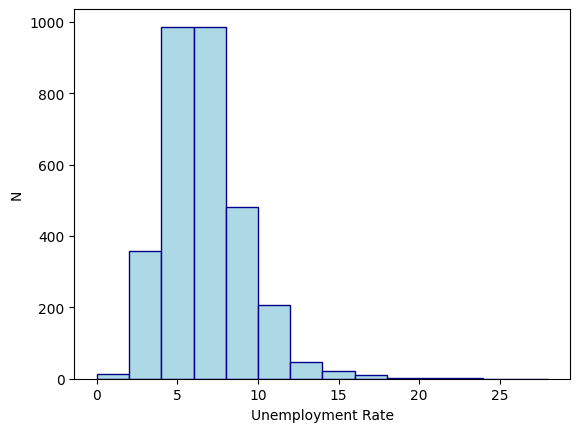

In [23]:
# histograma
fig = plt.figure()
ax = fig.add_subplot(111)

var = 'Unemployment Rate'
#bins=np.arange(0,100,10)
n,bins,patches = ax.hist(dat[var], histtype='bar', ec='darkblue', fc='lightblue', bins=np.arange(0,30,2))  #el bins establece la cantidad de cajas y cada cuanto
ax.set_xlabel(var)
ax.set_ylabel('N')

**Binning bias.**

Lo histogramas son informativos y permiten entender las características genelares de nuestros datos, pero la gran desventaja, es que los mismos datos pueden interpretarse de distinta forma dependiendo de la elección de bins. La elección del número de bins es arbitraria, lo cual puede generar sesgos (binning bias). Adicionalmente, en un histograma no estamos graficando todos los datos, sino que los agrupamos en bins, y por lo tanto perdemos sus valores. Una regla común es usar un número de bins igual a la raíz cuadrada del número de muestras.

55


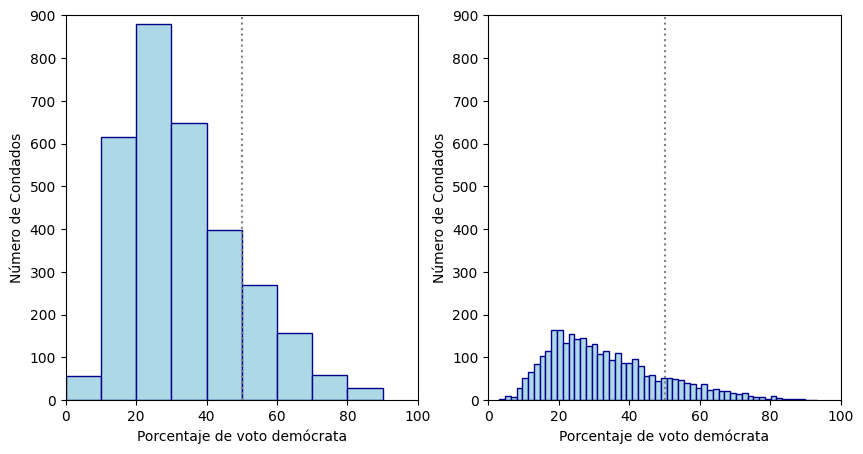

In [24]:
#Notar las diferencias de binning
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

bins = np.arange(0,100,10)
nbins = int(np.sqrt(len(dat)))
print(nbins)

_=ax1.hist(dat['pct_D'], bins = bins, histtype='bar', ec='darkblue', fc='lightblue')
_=ax2.hist(dat['pct_D'], bins = nbins, histtype='bar', ec='darkblue', fc='lightblue')

for ax in [ax1,ax2]:
    ax.set_xlabel('Porcentaje de voto demócrata')
    ax.set_ylabel('Número de Condados')
    ax.axvline(x=50, ls=':', color='gray')
    ax.set_ylim(0,900)
    ax.set_xlim(0,100)

es importante ver como estamos dividiendo, porque se ve en la derecha que hay menos datos


## 4. Análisis Exploratorio Multivariado
(Se analizan varias variables, el multivariado, es buscar como se conecta una variable con la otra).. En machinelearning hay herramientas que nos permiten juntar variables

¿Cómo se comportan las distintas variables políticas y socioeconómicas por región, estado, o según el partido ganador? ¿Podemos sacar alguna conclusión a partir de distintos análisis gráficos?

<Axes: xlabel='pct_D', ylabel='Count'>

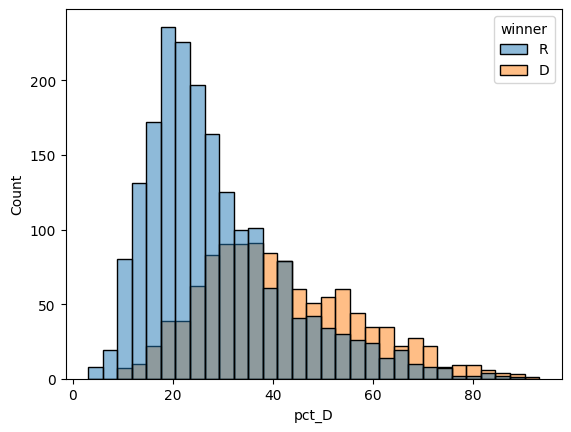

In [25]:
sns.histplot(data=dat2, x='pct_D', hue='winner')

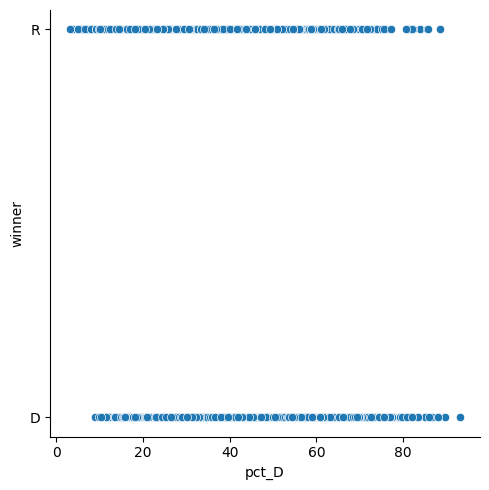

In [27]:
sns.relplot(data=dat2, x='pct_D', y='winner')
#grafica las relaciones entre dos variables

¿porque no entrega informacion?, porque estas cosas son categoricas..

/var/folders/2m/78v6gw9x19x1vhlbn1gn2pp40000gn/T/ipykernel_2524/1770339901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat2['winner'] = ['D' if x>=50.0 else 'R' for x in dat2['pct_D']]


<Axes: xlabel='pct_D', ylabel='Count'>

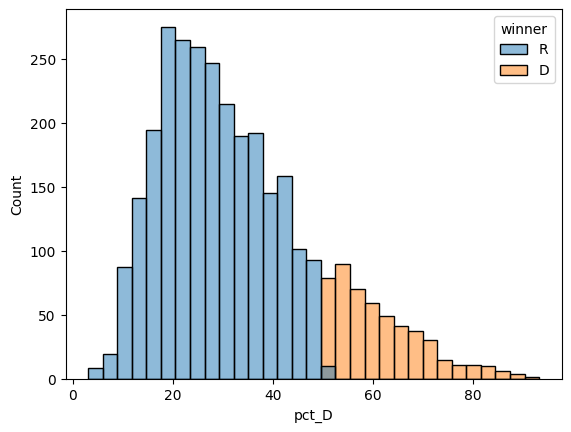

In [28]:
dat2['winner'] = ['D' if x>=50.0 else 'R' for x in dat2['pct_D']]
sns.histplot(data=dat2,x='pct_D',hue='winner')

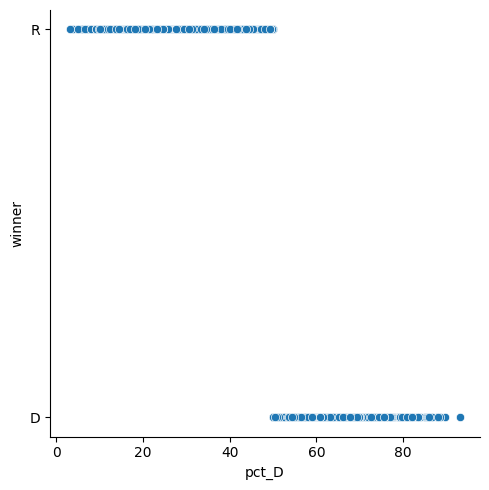

In [29]:
sns.relplot(data=dat2, x='pct_D', y='winner')

In [30]:
columns=['pct_D','pct_R','acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service',
       'pct_pop25+_bachelor_higher', 'median_household_income',
       'per_capita_income','POPESTIMATE2019','state','county','Unemployment Rate','winner','region']### Boxplot multivariado.

<Axes: xlabel='winner', ylabel='acs_pct_pop_nonwhite'>

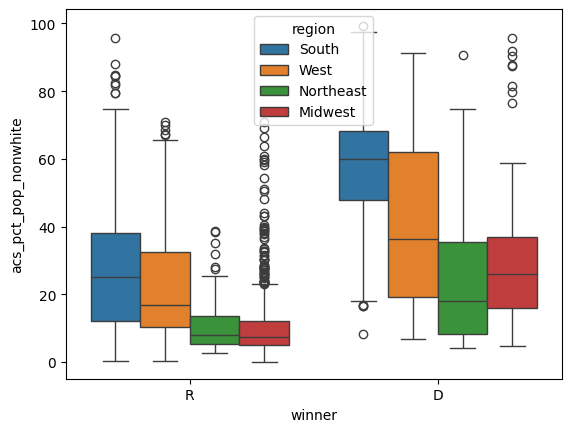

In [33]:
sns.boxplot(data=dat2, y='acs_pct_pop_nonwhite', x='winner', hue='region')

#aqui resumimos el histograma , porque el histograma es dificil de ver

<Axes: xlabel='state', ylabel='acs_pct_pop_nonwhite'>

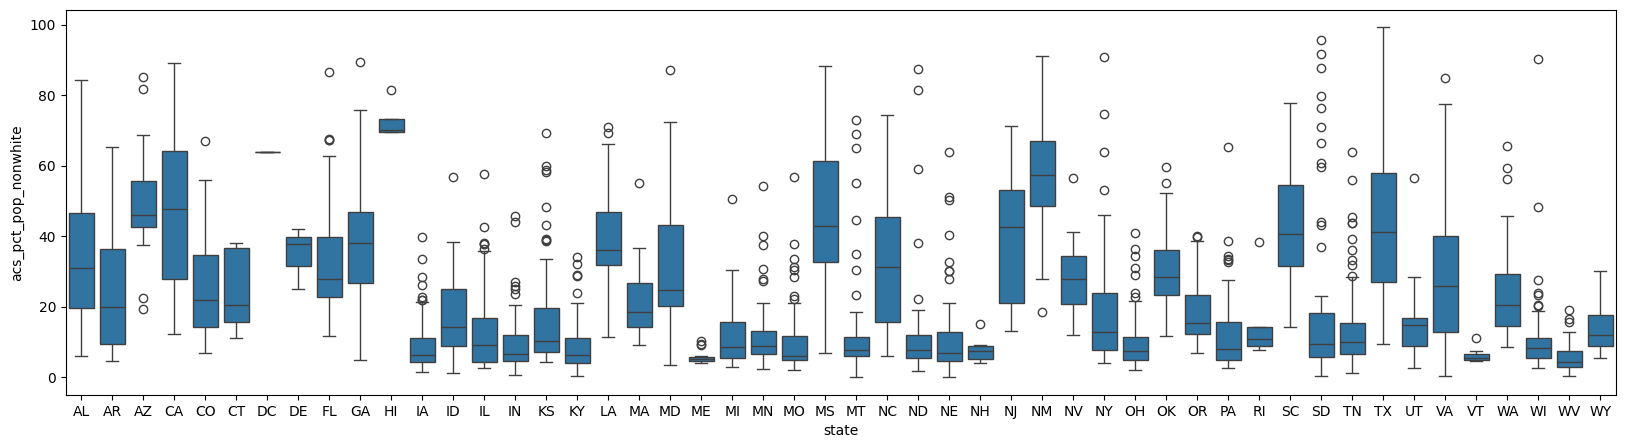

In [34]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
sns.boxplot(ax=ax,data=dat2,y='acs_pct_pop_nonwhite',x='state',width=0.8)

In [37]:
#analicemos ahora los coeficientes de correlación para un subconjunto de condados: los que están en swing states

swing = ['GA','PA','AZ','MI','WI',]
dats = dat2[dat2['state'].isin(swing)]
dats

,pct_D,pct_R,acs_pct_pop_nonwhite,acs_pct_management,acs_pct_service,pct_pop25+_bachelor_higher,median_household_income,per_capita_income,POPESTIMATE2019,state,county,Unemployment Rate,winner,region
142,66.225975,32.531559,81.681161,31.4,24.8,11.7,32963.0,14499.0,71887,AZ,Apache,10.3,D,West
143,40.603544,57.887595,42.850370,30.1,22.4,19.0,55550.0,23653.0,462789,AZ,Pinal,5.9,R,West
144,34.633189,63.906131,19.327383,31.6,23.0,25.2,50180.0,28829.0,235099,AZ,Yavapai,5.4,R,West
145,32.329550,66.434097,37.574906,32.5,23.8,18.5,42092.0,22939.0,54018,AZ,Gila,5.9,R,West
146,23.723583,75.032484,22.399352,25.6,25.4,12.9,43266.0,24829.0,212181,AZ,Mohave,7.4,R,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029,31.404959,67.317806,7.447886,27.9,14.7,19.3,53260.0,27915.0,18913,WI,Green Lake,4.6,R,Midwest
3030,30.273426,68.427031,6.968447,37.2,14.8,30.7,74062.0,37631.0,136034,WI,Washington,5.5,R,Midwest
3031,26.564626,72.551020,2.628545,30.0,20.0,18.3,49128.0,30674.0,4295,WI,Florence,6.3,R,Midwest
3032,39.717018,58.994272,7.544286,32.3,15.6,21.6,53473.0,30006.0,72999,WI,Wood,6.2,R,Midwest


<Axes: xlabel='winner', ylabel='acs_pct_pop_nonwhite'>

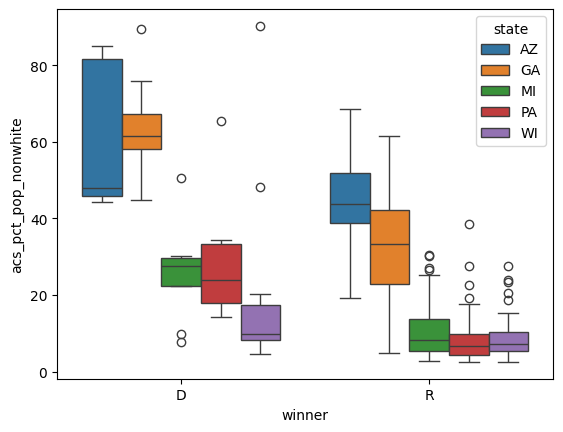

In [38]:
sns.boxplot(data=dats,y='acs_pct_pop_nonwhite',x='winner',hue='state')

<Axes: xlabel='state', ylabel='acs_pct_pop_nonwhite'>

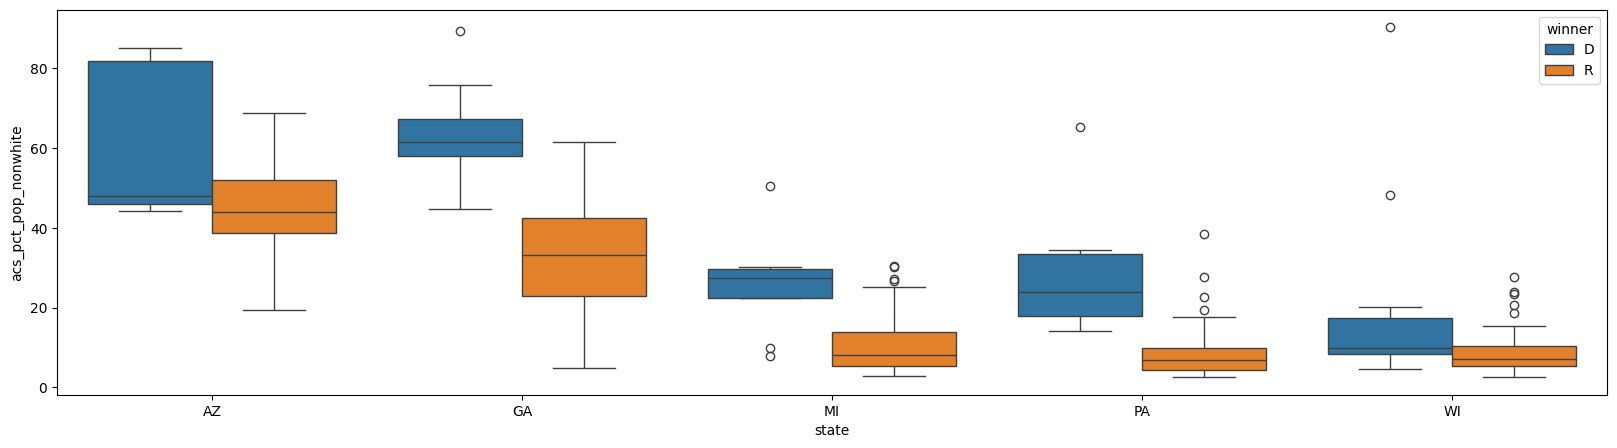

In [39]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
sns.boxplot(data=dats,y='acs_pct_pop_nonwhite',x='state',hue='winner')

<Axes: xlabel='region', ylabel='acs_pct_pop_nonwhite'>

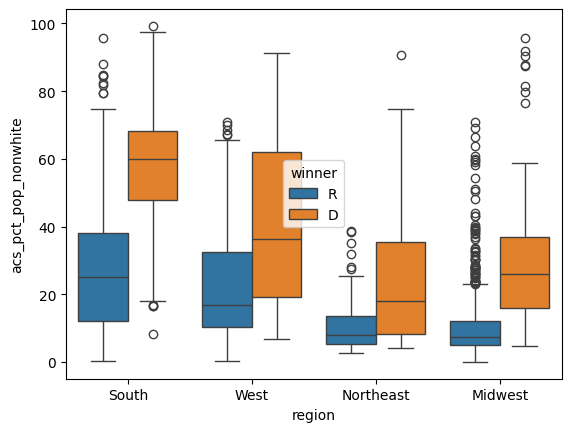

In [40]:
sns.boxplot(data=dat2,y='acs_pct_pop_nonwhite',x='region',hue='winner')

<Axes: xlabel='state', ylabel='acs_pct_pop_nonwhite'>

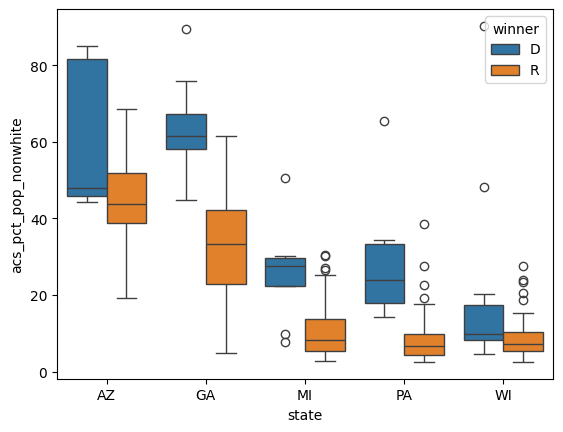

In [41]:
sns.boxplot(data=dats,y='acs_pct_pop_nonwhite',x='state',hue='winner')

<Axes: xlabel='state', ylabel='Unemployment Rate'>

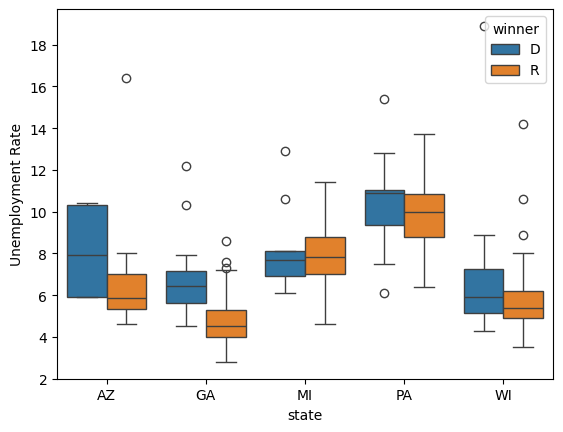

In [42]:
sns.boxplot(data=dats,y='Unemployment Rate',x='state',hue='winner')

Para los swing states, se aprecia una tendencia entre el ganador del condado, y el porcentaje de población no-blanca: en general este porcentaje tiene una distribución de valores más altos en los condados donde ganan los demócratas.

### 4.1 Gráficos de dispersión.

Podemos visualizar en más detalle la relación entre estas (y otras variables) usando gráficos de dispersión.

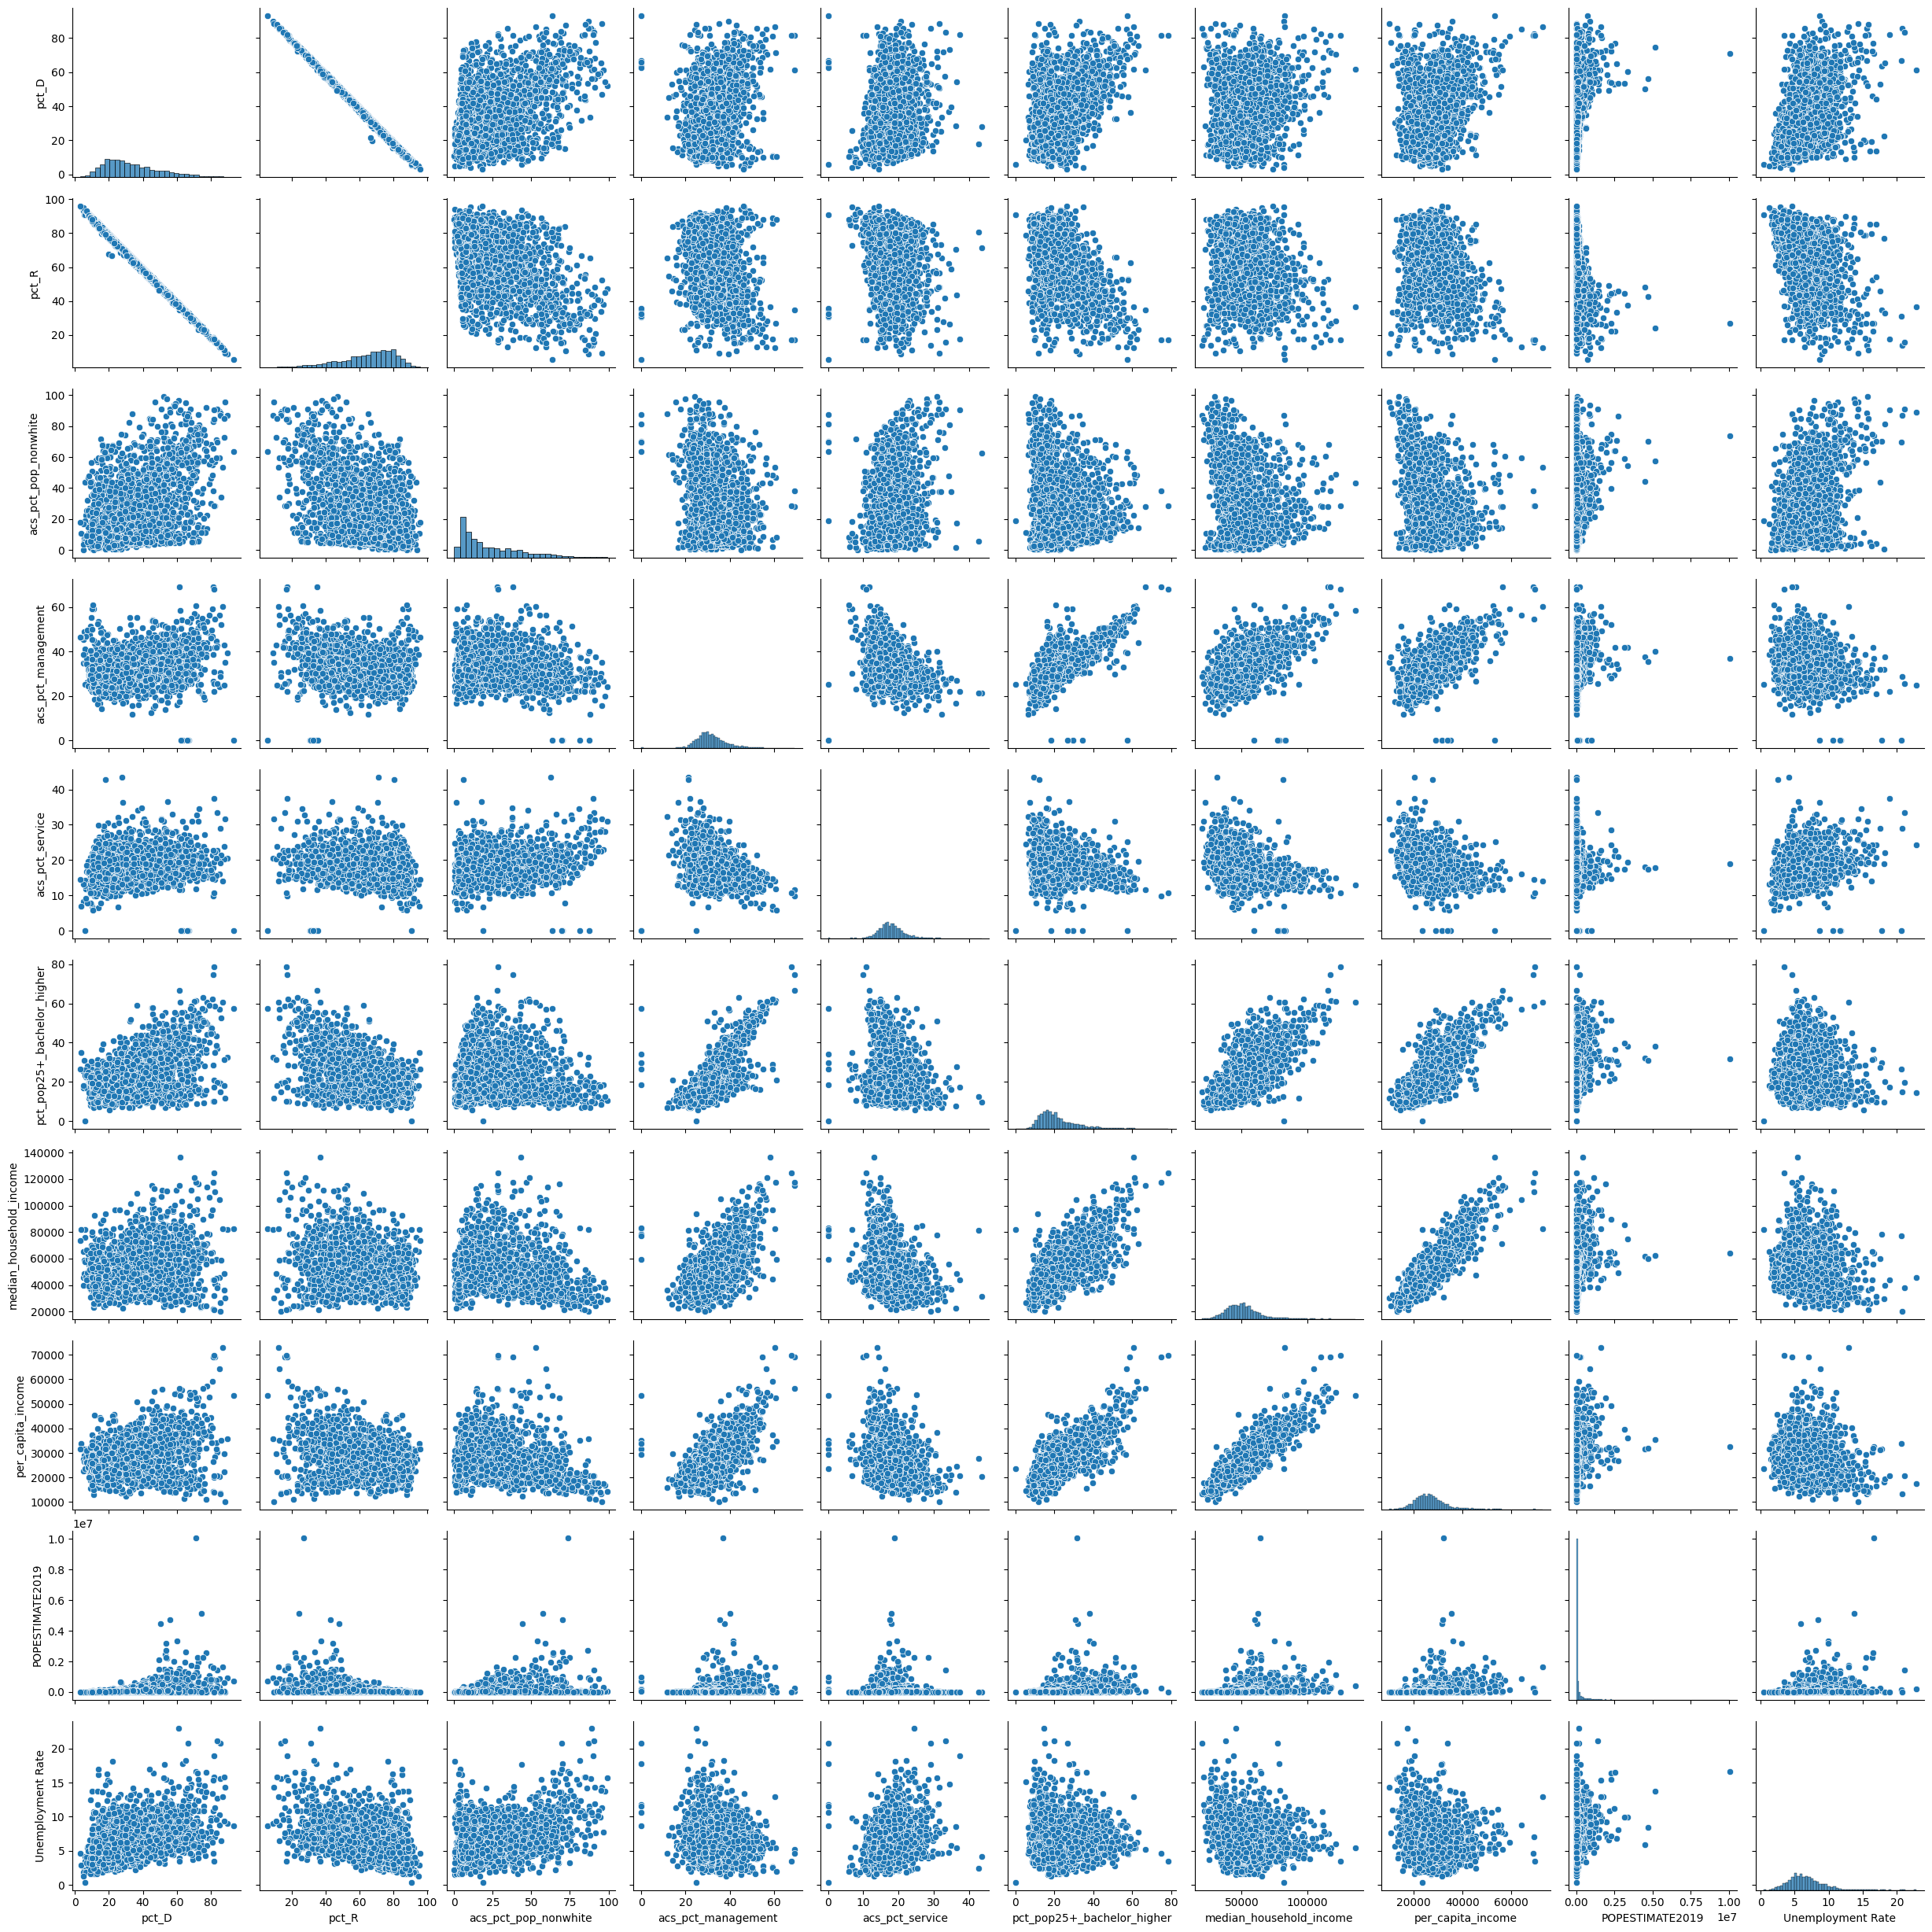

In [43]:
sns.pairplot(dat2)
#que es lo que pasa entre las parejas de variables

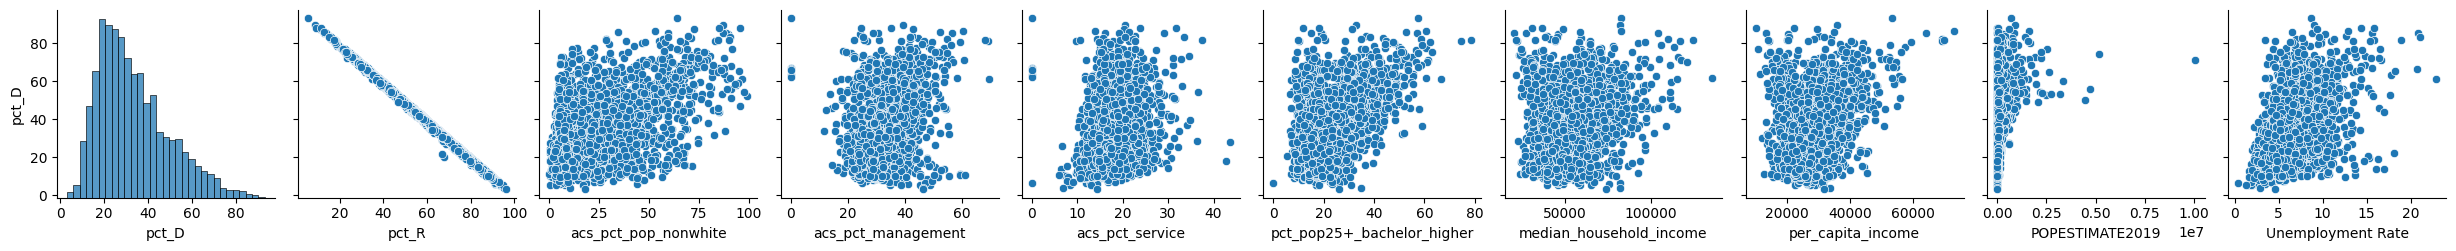

In [44]:
sns.pairplot(dat2,y_vars='pct_D')

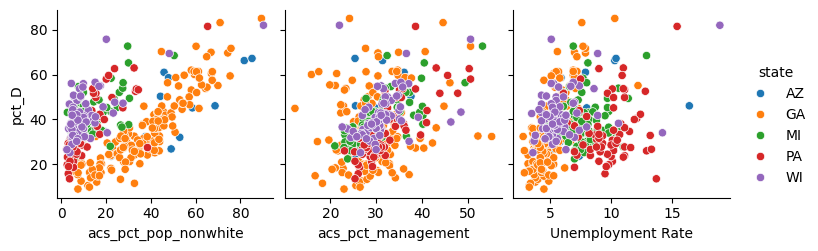

In [45]:
sns.pairplot(dats,y_vars=['pct_D'],x_vars=['acs_pct_pop_nonwhite', 'acs_pct_management', 'Unemployment Rate'],hue='state',aspect=1);

### 4.2 Coeficientes de correlación.

Veamos ahora cómo es la correlación entre variables y cómo visualizarla

In [48]:
#para calcular los coeficientes de correlación entre todas las variables, es más eficiente usar al función .corr() de pandas
corr = dats[['pct_D', 'pct_R', 'acs_pct_pop_nonwhite', 'acs_pct_management', 'acs_pct_service', 'pct_pop25+_bachelor_higher', 'median_household_income', 'per_capita_income', 'POPESTIMATE2019', 'Unemployment Rate']].corr()
corr  #se hace la matriz de correlacion

,pct_D,pct_R,acs_pct_pop_nonwhite,acs_pct_management,acs_pct_service,pct_pop25+_bachelor_higher,median_household_income,per_capita_income,POPESTIMATE2019,Unemployment Rate
pct_D,1.000000,-0.999540,0.504682,0.374074,0.221356,0.464363,0.151392,0.233101,0.361455,0.280014
pct_R,-0.999540,1.000000,-0.489510,-0.382034,-0.218613,-0.475301,-0.165864,-0.244990,-0.363373,-0.281756
acs_pct_pop_nonwhite,0.504682,-0.489510,1.000000,-0.081703,0.198060,-0.112735,-0.337535,-0.391954,0.162224,-0.068337
acs_pct_management,0.374074,-0.382034,-0.081703,1.000000,-0.222806,0.892264,0.719337,0.744809,0.390325,-0.012405
acs_pct_service,0.221356,-0.218613,0.198060,-0.222806,1.000000,-0.153689,-0.420418,-0.321475,-0.059408,0.342432
pct_pop25+_bachelor_higher,0.464363,-0.475301,-0.112735,0.892264,-0.153689,1.000000,0.761776,0.828440,0.400909,0.042708
median_household_income,0.151392,-0.165864,-0.337535,0.719337,-0.420418,0.761776,1.000000,0.884556,0.287357,-0.013016
per_capita_income,0.233101,-0.244990,-0.391954,0.744809,-0.321475,0.828440,0.884556,1.000000,0.323507,0.063679
POPESTIMATE2019,0.361455,-0.363373,0.162224,0.390325,-0.059408,0.400909,0.287357,0.323507,1.000000,0.178626
Unemployment Rate,0.280014,-0.281756,-0.068337,-0.012405,0.342432,0.042708,-0.013016,0.063679,0.178626,1.000000


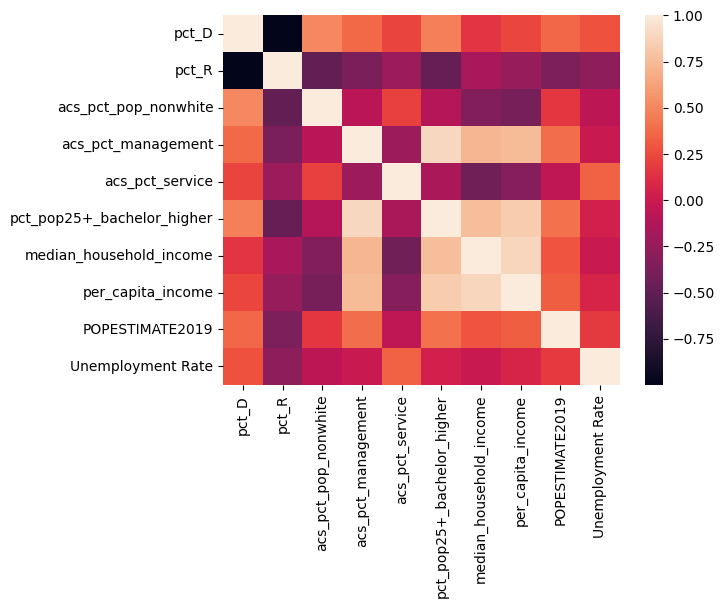

In [49]:
sns.heatmap(corr);  #podemos ver mejor la tabla de datos correlacion